In [1]:
import numpy as np
from imblearn.over_sampling import ADASYN,SMOTE
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

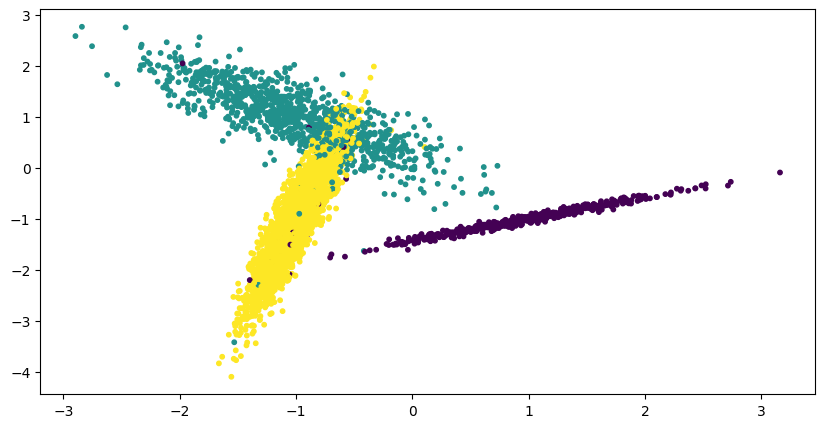

In [13]:
X, y = make_classification(n_classes=3,weights=[0.1,0.2,0.7],n_samples=5000,
                           n_features=2,n_informative=2,n_redundant=0,
                           n_clusters_per_class=1)
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.show()

In [14]:
sum(y==0),sum(y==1),sum(y==2)

(np.int64(513), np.int64(1007), np.int64(3480))

In [15]:
smote = SMOTE(); 
X_new,y_new = smote.fit_resample(X,y); 

In [16]:
sum(y_new==0),sum(y_new==1),sum(y_new==2)

(np.int64(3480), np.int64(3480), np.int64(3480))

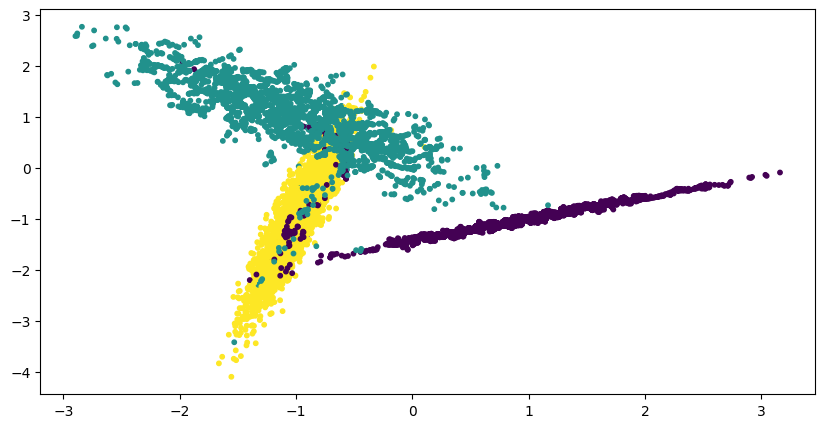

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(X_new[:,0],X_new[:,1],c=y_new,s=10)
plt.show()

In [18]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
5000/sum(y==0),5000/sum(y==1),5000/sum(y==2)

(np.float64(9.746588693957115),
 np.float64(4.965243296921549),
 np.float64(1.4367816091954022))

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True); 
x_trainn,x_testn,y_trainn,y_testn = train_test_split(X_new,y_new,test_size=0.2,shuffle=True)

In [25]:
from sklearn.metrics import f1_score

In [30]:
clf1 = BalancedRandomForestClassifier(n_estimators=1000); 
clf2 = RandomForestClassifier(n_estimators=1000); 
clf3 = RandomForestClassifier(n_estimators=1000,class_weight={0:9.74658,1:4.96524,2:1.43678}); 
clf1.fit(x_train,y_train);
clf2.fit(x_train,y_train); 
clf3.fit(x_train,y_train); 
predict1 = clf1.predict(x_test); 
predict2 = clf2.predict(x_test); 
predict3 = clf3.predict(x_test); 

In [32]:
print(f1_score(y_test,predict1,average='macro')); 
print(f1_score(y_test,predict2,average='macro'));
print(f1_score(y_test,predict3,average='macro'));

0.938458440381774
0.9430584210366583
0.9417340835718861
